# ML - Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets

## Motivation

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Source: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


First 10 columns are numeric predictive values

Column 11 is a quantitative measure of disease progression one year after baseline


| Feature       | Description     |
| :------------- | :----------: |
| age | age in years|
| sex | sex |
| bmi | body mass index|
| bp | average blood pressure|
| s1 | tc, T-Cells (a type of white blood cells)|
| s2 | ldl, low-density lipoproteins|
| s3 | hdl, high-density lipoproteins|
| s4 | tch, thyroid stimulating hormone|
| s5 | ltg, lamotrigine|
| s6 | glu, blood sugar level|

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

In [3]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [4]:
diabetes.apply(np.linalg.norm)

age          1.000000
sex          1.000000
bmi          1.000000
bp           1.000000
s1           1.000000
s2           1.000000
s3           1.000000
s4           1.000000
s5           1.000000
s6           1.000000
target    3584.818126
dtype: float64

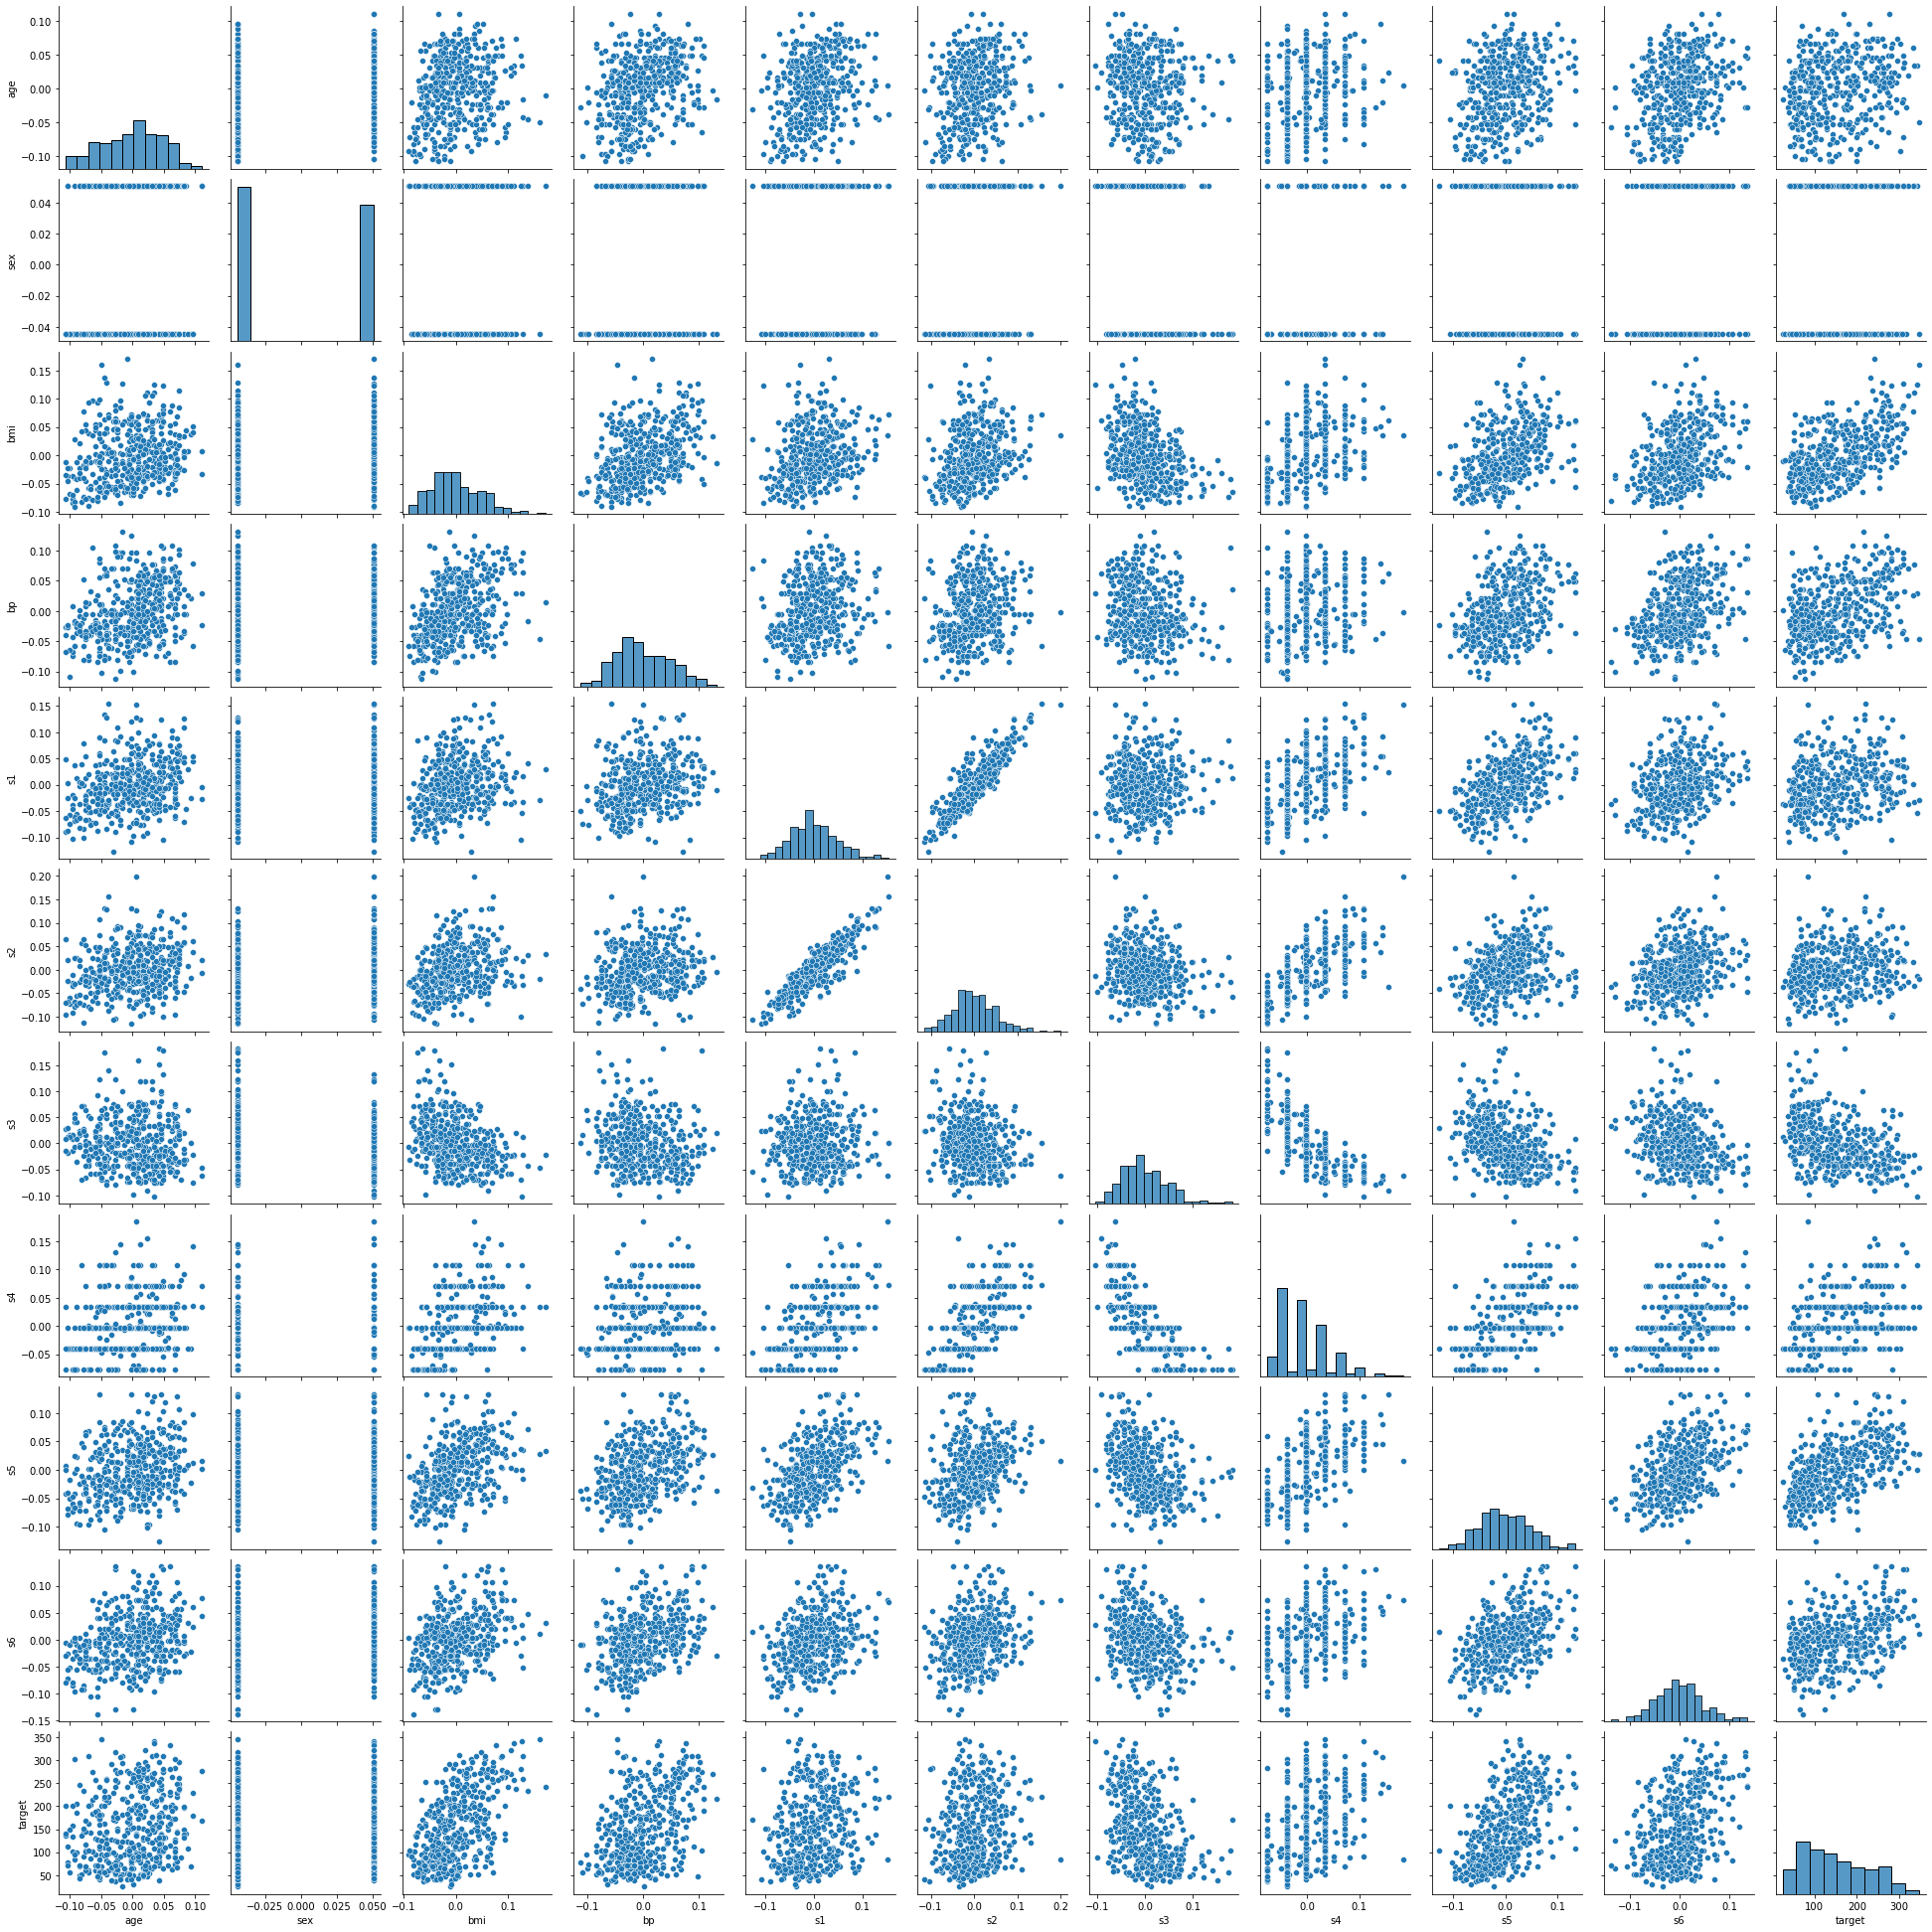

In [5]:
sns.pairplot(diabetes)

## Linear Regression

The first approach is to work with a linear model, let's suppose we have $n$ samples of data and each sample $x^{(i)} \in \mathbb{R}^{p \times 1}$  where $p$ denotes the number of features. Then

$$x^{(i)} = (x^{(i)}_1, ..., x^{(i)}_n)^\top \qquad, \forall i=1,\dots, \, n$$ 

And for each $x^{(i)}$ we know the target value denoted by $y^{(i)} \in \mathbb{R}$, $i=1,\dots, n$ .

Let's consider a lineal function $h$ and a vector of coefficients $\beta \in \mathbb{R}^{(p+1) \times 1}$ such that

$$\begin{aligned}
f_\beta(x^{(i)}) &= \beta_0 + \beta_1 x^{(i)}_1 + \beta_2 x^{(i)}_2 + ... + \beta_p x^{(i)}_p \\
    &= \begin{bmatrix} 1 & x^{(i)}_1 & x^{(i)}_2 & \dots & x^{(i)}_p\end{bmatrix}
        \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p\end{bmatrix}  \\
    &= \left(x^{(i)}\right)^\top \beta \qquad \left(\text{where} \quad x^{(i)}_0 = 1\right)
\end{aligned}  $$ 

Let's define the matrix of inputs $X \in \mathbb{R}^{n \times (p + 1)} $, also know as design matrix, model matrix or regressor matrix, and the output vector $y \in \mathbb{R}^n$ such that 

$$
X = 
\begin{bmatrix} 
 (x^{(1)})^\top  \\ 
 (x^{(2)})^\top  \\
\vdots \\
 (x^{(n)})^\top  \\
\end{bmatrix}
=
\begin{bmatrix} 
1 & x^{(1)}_1 & \dots & x^{(1)}_p \\ 
1 & x^{(2)}_1 & \dots & x^{(2)}_p \\
\vdots & \vdots & & \vdots \\
1 & x^{(n)}_1 & \dots & x^{(n)}_p \\
\end{bmatrix} 

\qquad
\text{and}
\qquad

y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)}\end{bmatrix}
$$




Notice that now we can write this as a matrix operation

$$\begin{aligned}
X \beta &= 
\begin{bmatrix}
1 & x_1^{(1)} & ... & x_p^{(1)} \\
\vdots & \vdots & & \vdots \\
1 & x_1^{(n)} & ... & x_p^{(n)} \\
\end{bmatrix}
\begin{bmatrix}\beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix} 
 = 
\begin{bmatrix}
\beta_0 + x^{(1)}_1 \beta_1 + ... + x^{(1)}_p \beta_p \\
\vdots \\
\beta_0 + x^{(n)}_1 \beta_1 + ... + x^{(n)}_p \beta_p \\
\end{bmatrix} 
 = 
\begin{bmatrix}
f_\beta(x^{(1)}) \\
\vdots \\
f_\beta(x^{(n)})
\end{bmatrix}\end{aligned}$$


Then our goal is to find an adequate vector of coefficients $\beta$ such taht
$$\begin{aligned}
\begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)}\end{bmatrix}
\approx
\begin{bmatrix}
f_\beta(x^{(1)}) \\
f_\beta(x^{(2)}) \\
\vdots \\
f_\beta(x^{(n)})
\end{bmatrix}
\end{aligned}$$

that is equivalent to
$$y \approx X \beta $$

## Gradient Descent

Let's define our cost function

$$J(\beta) = \frac{1}{2} \left\lVert y - X \beta \right\rVert^2_2 =  \frac{1}{2} \sum_{i=1}^{n} \left( y^{(i)} - f_\beta(x^{(i)})\right)^2$$

The goal is to solve the following optimization problem

$$\min_{\beta} J(\beta) = \min_{\beta} \frac{1}{2}  \left\lVert y - X \beta \right\rVert^2_2$$

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models. The idea is to take repeated steps in the opposite direction of the gradient because this is the direction of steepest descent. 

The algorithm can be written as

$$\beta^{(n+1)} = \beta^{(n)} - \alpha \nabla_{\beta} J(\beta^{(n)})$$

where $\alpha >0$ is called learning rate. Now, let's compute the gradient of $J(\beta)$. For any $k = 0, \ldots, p$ we have 

$$\begin{aligned}
\frac{\partial J(\beta)}{\partial \beta_k} &=
\frac{\partial }{\partial \beta_k} \frac{1}{2} \sum_{i=1}^{n} \left(  y^{(i)} - f_{\beta}(x^{(i)})\right)^2 \\
&= \frac{1}{2} \sum_{i=1}^{m}  2 \left(  y^{(i)} - f_{\beta}(x^{(i)}) \right) \frac{\partial f_{\beta}(x^{(i)})}{\partial \beta_k}\\
&= \sum_{i=1}^{n} \left(  y^{(i)} - f_{\beta}(x^{(i)})\right) x^{(i)}_k\end{aligned}$$

Then
$$
\begin{aligned}
    \nabla_{\beta} J(\beta)
    &= \left(
        \sum_{i=1}^{n} \left(  y^{(i)} - f_{\beta}(x^{(i)})\right) x^{(i)}_0, 
        \dots,
        \sum_{i=1}^{n} \left(  y^{(i)} - f_{\beta}(x^{(i)})\right) x^{(i)}_p
    \right)^\top = X^\top \left( y - X \beta \right)
\end{aligned}
$$

Note that $\alpha$ is a parameter from the algorithm and not from the model itself. These kind of parameters are usually named as __hyper-parameters__ and to find the best one is a big task itself.

## Implementation

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(diabetes_X, diabetes_y)
print(f"Coefficients:\n {model.coef_.T}\n")
print(f"Score: {model.score(diabetes_X, diabetes_y)}")


Coefficients:
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]

Score: 0.5177484222203499


In [7]:
%%timeit
LinearRegression().fit(diabetes_X, diabetes_y)

993 µs ± 171 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## More Algorithms

### Ridge 

Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares,
$$
\min_\beta J(\beta) = \min_{\beta} \frac{1}{2}  \left\lVert y - X \beta \right\rVert^2_2 + \frac{\alpha}{2} \left\lVert \beta \right\rVert_2^2
$$
where $\alpha > 0$ is a complexity parameter that controls the amount of shrinkage. This penalization helps to deal with colinearity.

In [23]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(diabetes_X, diabetes_y)
print(f"Coefficients:\n {ridge_model.coef_.T}\n")
print(f"Score: {ridge_model.score(diabetes_X, diabetes_y)}")

Coefficients:
 [  20.13800709 -131.24149467  383.48370376  244.83506964  -15.18674139
  -58.34413649 -174.84237091  121.9849503   328.4987567   110.8864333 ]

Score: 0.4875007515715647


### Lasso

Lasso regression is also a regularization technique, but instead of penalizing using a $\ell_2$-norm it considers a $\ell_1$-penalization. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients and even it could be utilized as a way to select features in a model.

$$
\min_\beta J(\beta) = \min_{\beta} \frac{1}{2n}  \left\lVert y - X \beta \right\rVert^2_2 + \alpha \left\lVert \beta \right\rVert_1^2
$$

where $\left\lVert \beta \right\rVert_1 = \sum_{i=0}^p \left\lvert \beta_i \right\rvert$.

In [25]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5)
lasso_model.fit(diabetes_X, diabetes_y)
print(f"Coefficients:\n {lasso_model.coef_.T}\n")
print(f"Score: {lasso_model.score(diabetes_X, diabetes_y)}")

Coefficients:
 [  0.          -0.         471.04187427 136.50408382  -0.
  -0.         -58.31901693   0.         408.0226847    0.        ]

Score: 0.45524097290369625


### Elastic-Net 

Elastic-Net is a compromise between Ridge and Lasso regression, considering both $\ell_1$ and $\ell_2$-norm regularizaion. Let's considering a ratio $\rho \in (0,1)$, then

$$
\min_\beta J(\beta) = \min_{\beta} \frac{1}{2n}  \left\lVert y - X \beta \right\rVert^2_2 + \alpha \rho \left\lVert \beta \right\rVert_1^2 + \frac{\alpha (1 - \rho)}{2} \left\lVert \beta \right\rVert_2^2
$$


In [26]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=0.5, l1_ratio=0.4)
elasticnet_model.fit(diabetes_X, diabetes_y)
print(f"Coefficients:\n {elasticnet_model.coef_.T}\n")
print(f"Score: {elasticnet_model.score(diabetes_X, diabetes_y)}")

Coefficients:
 [ 1.55873597  0.          6.36640961  4.61688157  1.82562593  1.36291798
 -4.0457662   4.44665465  6.10117638  3.8868802 ]

Score: 0.018495661086463056


### Decision Tree

Tree-based methods are non-parametric models that involve stratifying or segmenting the predictor space into a number of simple regions. They are conceptually simple yet powerful. Its name come from the fact that the set of splitting rules used to segment the predictor space can be summarized in a tree.

Roughly speaking, there are two steps in these models.

1. We divide the predictor space ($X$) into $J$ distinct and non-overlapping regions, $R_1, R_2, \ldots , R_J$.
2. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values.

In [44]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(
    min_samples_leaf=0.01,
    random_state=42
)
decision_tree_model.fit(diabetes_X, diabetes_y)
# print(f"Coefficients:\n {decision_tree_model.coef_.T}\n")
print(f"Score: {decision_tree_model.score(diabetes_X, diabetes_y)}")

Score: 0.7617420924706106


### Random Forest

It is an ensemble method, approach that combines many simple _blocks_ models in order to obtain a single and potentially very powerful model. Blocks are decision trees on where each tree just use a random sample of predictors.

In [42]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model =  RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
random_forest_model.fit(diabetes_X, diabetes_y)
print(f"Score: {random_forest_model.score(diabetes_X, diabetes_y)}")

Score: 0.9195910933940452
